In [1]:
%matplotlib inline
import json

In [2]:
with open('./two-sigma-connect-rental-listing-inquiries/train.json') as train:
    json_data = json.load(train)
    
df = pd.DataFrame(json_data)
df.tail()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
9999,1.0,2,297160caf8a88c10718b492d4672c6b4,2016-06-02 05:41:05,"30TH/3RD, MASSIVE CONV 2BR IN LUXURY FULL SERV...",E 30 St,"[Elevator, Laundry in Building, Laundry in Uni...",40.7426,7098690,-73.9790,2a1ee03b449700c3a15dd8c9a505c525,[https://photos.renthop.com/2/7098690_18396d32...,3200,230 E 30 St,medium
99991,1.0,1,9e871ccfea7b07686c101548ca693af6,2016-04-04 18:22:34,"HIGH END condo finishes, swimming pool, and ki...",Rector Pl,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.7102,6822449,-74.0163,ef20d40b528500037e37b167787ac089,[https://photos.renthop.com/2/6822449_b429587b...,3950,225 Rector Place,low
99992,1.0,1,7967a1280bf3f7644500fc79d2696b0e,2016-04-16 02:13:40,Large Renovated One Bedroom Apartment with Sta...,West 45th Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",40.7601,6881461,-73.9900,d889a9552265fe359e7d36d172084fcb,[https://photos.renthop.com/2/6881461_20a86530...,2595,341 West 45th Street,low
99993,1.0,0,ad67f6181a49bde19218929b401b31b7,2016-04-08 02:13:33,Stylishly sleek studio apartment with unsurpas...,Wall Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",40.7066,6841891,-74.0101,9fd3af5b2d23951e028059e8940a55d7,[https://photos.renthop.com/2/6841891_124c9c44...,3350,37 Wall Street,low
99994,1.0,2,5173052db6efc0caaa4d817112a70f32,2016-04-12 02:48:07,Look no further!!! This giant 2 bedroom apart...,Park Terrace East,[Hardwood Floors],40.8699,6858245,-73.9172,d7f57128272bfd82e33a61999b5f4c42,[https://photos.renthop.com/2/6858245_c4380bde...,2200,30 Park Terrace East,low


## EDA
- 피쳐 데이터 타입 살펴보기
- missing data 확인
- target variable 분포 확인
- price 분포 확인
- longitude/latitude 분포 확인
- bathroom, bedroom 분포 확인
- numeric feature 공선성 확인

In [3]:
df.shape

(49352, 15)

In [4]:
# 피쳐 데이터 타입 살펴보기
df_dtype = df.dtypes.reset_index()
df_dtype.columns = ['Count', 'Column Type']
df_dtype.groupby('Column Type').aggregate('count').reset_index()

,Column Type,Count
0,int64,3
1,float64,3
2,object,9


In [5]:
# missing data 없음
df.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

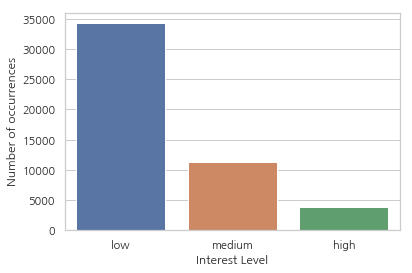

In [6]:
# Target variable exploration
sns.countplot(df.interest_level, order=['low', 'medium', 'high']);
plt.xlabel('Interest Level');
plt.ylabel('Number of occurrences');

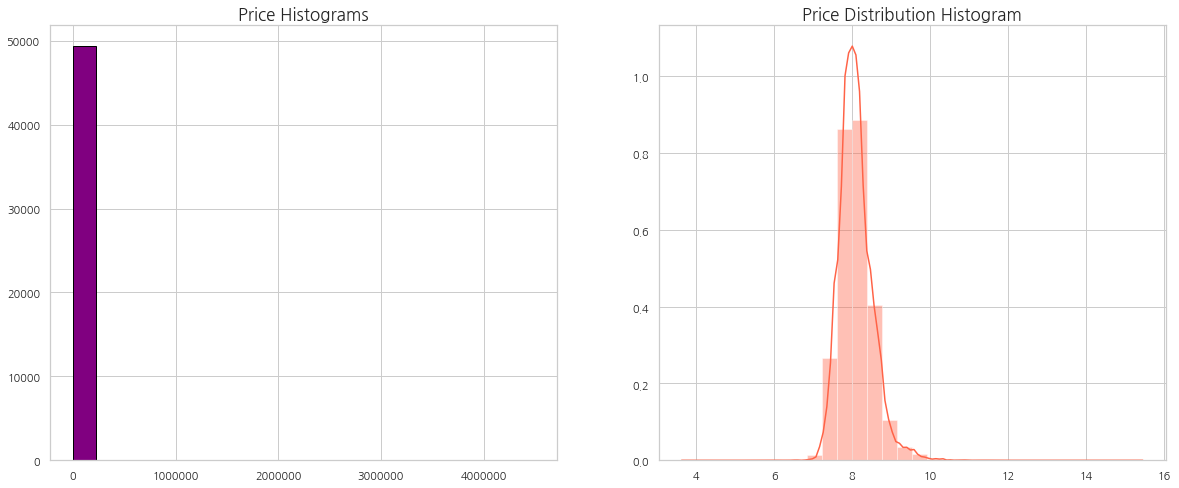

In [7]:
# price histogram
def price_histogram():
    fig,ax = plt.subplots(1,2, figsize=(20,8))
    ax1,ax2 = ax.flatten()

    df.price.plot.hist(bins=20, color='Purple', edgecolor='black', ax=ax1);
    ax1.set_title('Price Histograms', fontsize=17)
    ax1.set_ylabel('')
    ax1.set_xlabel('')

    log_price = np.log(df.price)
    sns.distplot(log_price,  bins=30, color='tomato', kde=True, ax=ax2)
    ax2.set_title("Price Distribution Histogram", fontsize=17)
    ax2.set_ylabel("")
    ax2.set_xlabel('')
    plt.subplots_adjust(wspace=0.2);

price_histogram()

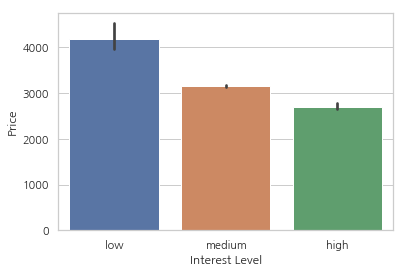

In [8]:
# Average Price per Interest Level
sns.barplot(x="interest_level", y="price", order=['low', 'medium', 'high'], data=df)
plt.xlabel('Interest Level')
plt.ylabel('Price')
plt.show()

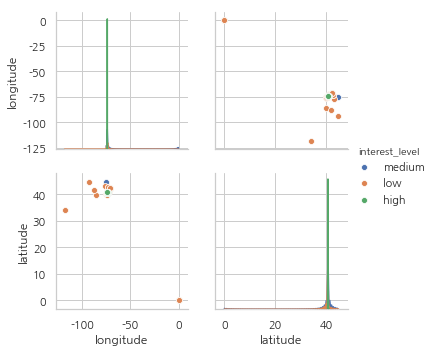

In [9]:
# longtitude/ latitude 분포 확인
sns.pairplot(df[['longitude', 'latitude', 'interest_level']], hue='interest_level')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.show()

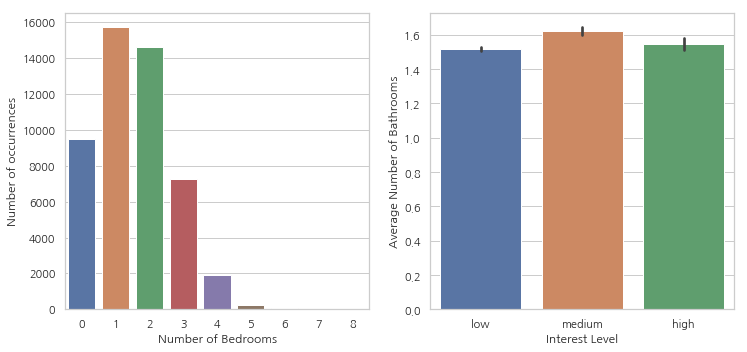

In [10]:
# Bedrooms graphs
fig = plt.figure(figsize=(12,12))
# Number of occurrences
sns.countplot(df.bedrooms, ax = plt.subplot(221));
plt.xlabel('Number of Bedrooms');
plt.ylabel('Number of occurrences');
# Average number of Bathrooms per Interest Level
sns.barplot(x='interest_level', y='bedrooms', data=df, order=['low', 'medium', 'high'],
            ax = plt.subplot(222));
plt.xlabel('Interest Level');
plt.ylabel('Average Number of Bathrooms');

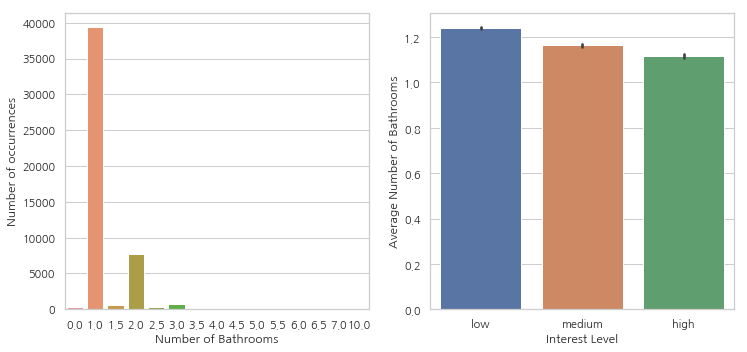

In [11]:
# Bathrooms graphs
fig = plt.figure(figsize=(12,12))
# Number of occurrences
sns.countplot(df.bathrooms, ax = plt.subplot(221));
plt.xlabel('Number of Bathrooms');
plt.ylabel('Number of occurrences');
# Average number of Bathrooms per Interest Level
sns.barplot(x='interest_level', y='bathrooms', data=df, order=['low', 'medium', 'high'],
            ax = plt.subplot(222));
plt.xlabel('Interest Level');
plt.ylabel('Average Number of Bathrooms');

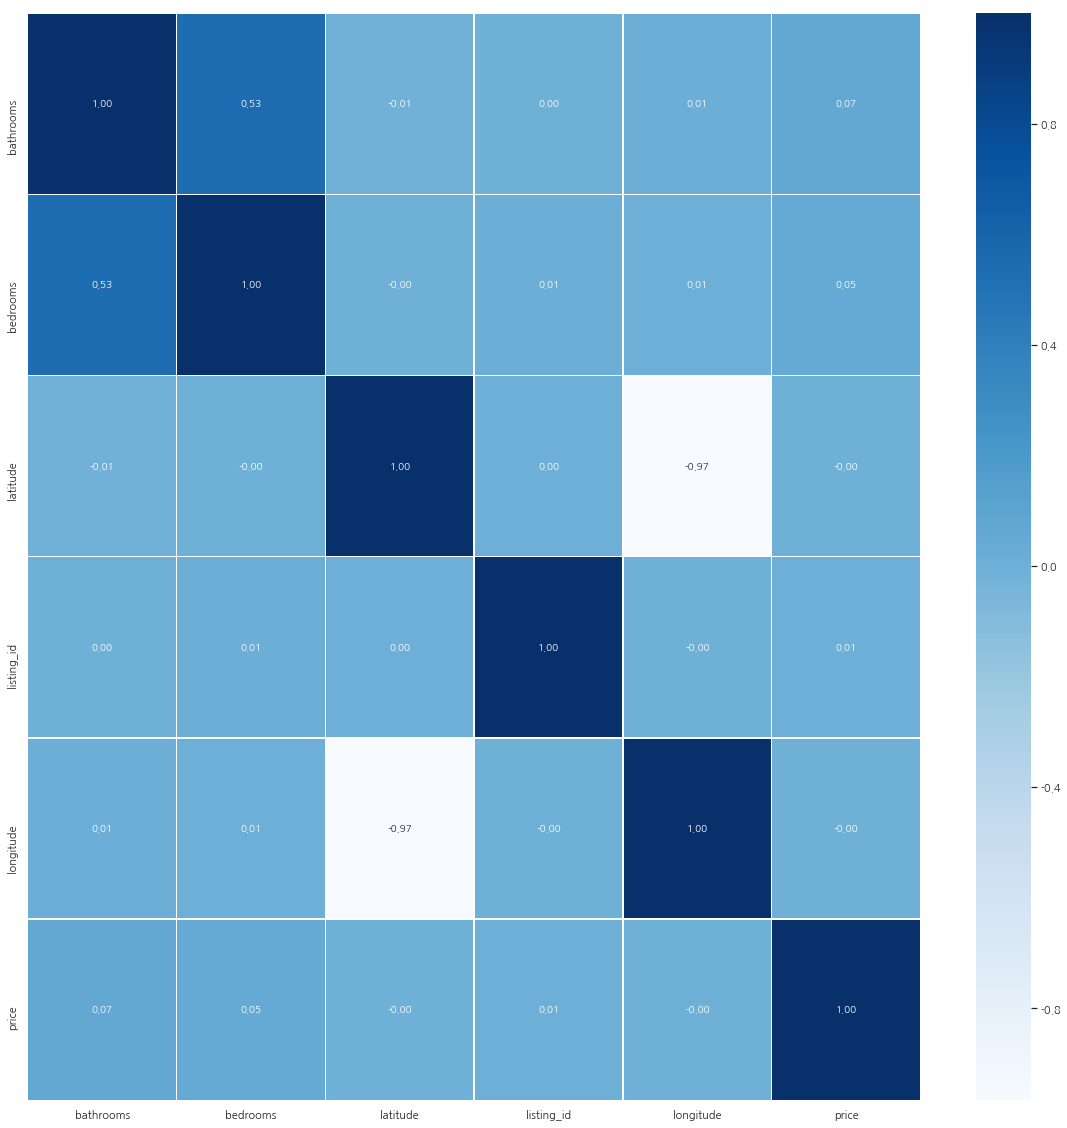

In [12]:
# numeric feature 공선성 확인
df_numeric = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(20,20))
sns.heatmap(data = df_numeric.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

## feature engineering
- 'created' 피쳐를 게시된 년도, 월, 날짜, 시간, 주말/평일 구분 column 추가
- price per bad column 추가
- price outlier 확인 및 상/하위 1% outlier 제거
- log price column 추가
- number of photos column 추가
- description length column 추가
- sutdio column(bedroom = 0)추가
- NY 벗어나는 위도경도 outlier 제거
- features column에서 상위 10개 새로운 column으로 생성
#### 고민해보기
- neighborhood column 
- building_id, manager_id 

In [13]:
# 게시된 년도, 월, 날짜, 시간 column 생성
df.created = pd.to_datetime(df.created, format='%Y-%m-%d %H:%M:%S')
df['month'] = df.created.dt.month
df['day_of_week'] = df.created.dt.weekday_name
df['hour'] = df.created.dt.hour
# 'created' column drop
df.drop('created', axis=1, inplace=True)

In [14]:
# 주말(1)/평일(0)  column 생성
df['weekend'] = df.apply(lambda row: 1 if row['day_of_week'] in ['Saturday', 'Sunday', 'Friday'] else 0, axis=1)

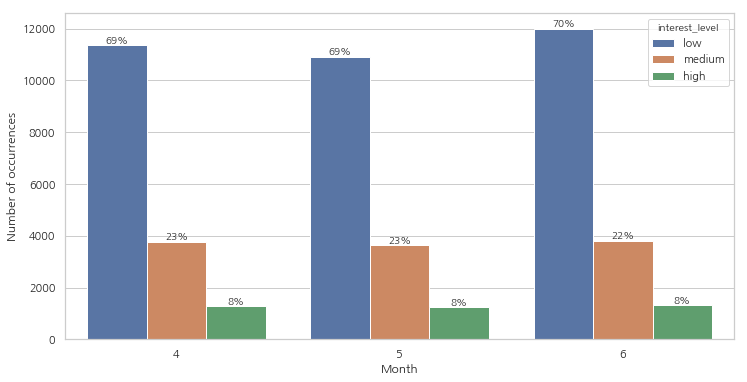

In [15]:
# Iterest per month
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="month", hue="interest_level", hue_order=['low', 'medium', 'high'],
                   data=df);
plt.xlabel('Month');
plt.ylabel('Number of occurrences')

# Adding percents over bars
height = [p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 50,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center") 

In [16]:
# # Iterest per Day of Week
# fig = plt.figure(figsize=(12,6))
# ax = sns.countplot(x="day_of_week", hue="interest_level",
#                    hue_order=['low', 'medium', 'high'], data=df,
#                    order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']);
# plt.xlabel('Day of Week');
# plt.ylabel('Number of occurrences');

# # Adding percents over bars
# height = [p.get_height() for p in ax.patches]
# ncol = int(len(height)/3)
# total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
# for i, p in enumerate(ax.patches):    
#     ax.text(p.get_x()+p.get_width()/2,
#             height[i] + 50,
#             '{:1.0%}'.format(height[i]/total[i]),
#             ha="center") 

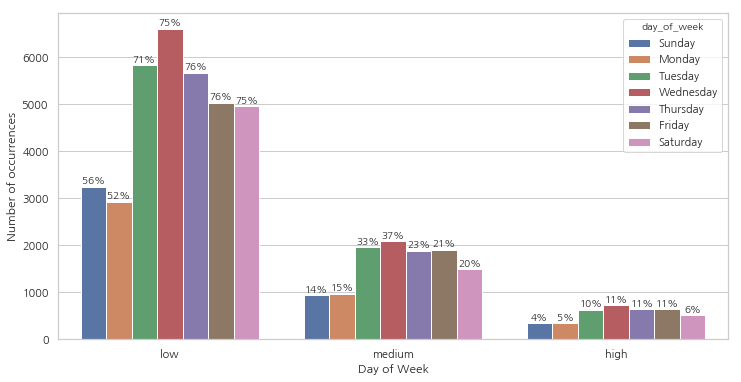

In [17]:
# Day of Week per Iterest
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="interest_level", hue="day_of_week",
                   hue_order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], data=df,
                   order=['low', 'medium', 'high'])
plt.xlabel('Day of Week')
plt.ylabel('Number of occurrences')

# Adding percents over bars
height = [p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 50,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center") 

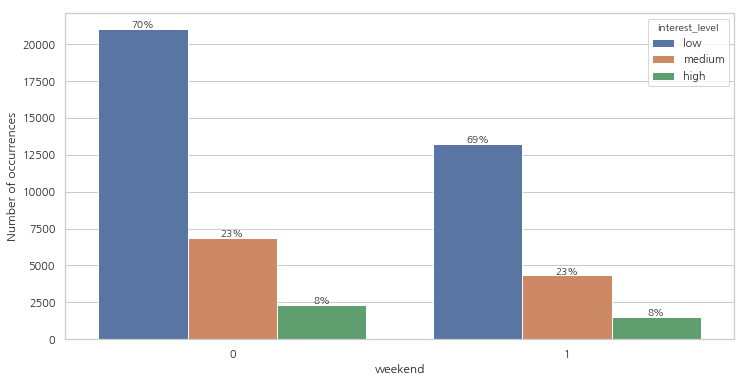

In [18]:
# Iterest per weekend
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(x="weekend", hue="interest_level", hue_order=['low', 'medium', 'high'],
                   data=df);
plt.xlabel('weekend');
plt.ylabel('Number of occurrences')

# Adding percents over bars
height = [p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 50,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center") 

In [19]:
# price per bedroom
df.bedrooms[df.bedrooms == 0] = 1
df['price_per_bedroom'] = np.round(df.price / df.bedrooms, 0)

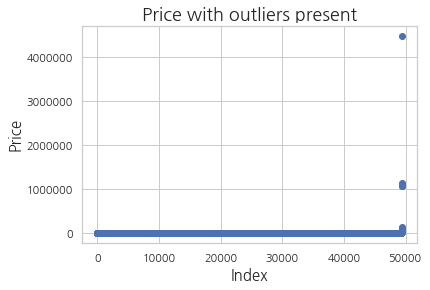

In [20]:
# price outlier 확인
plt.scatter(range(df.shape[0]), np.sort(df.price.values))
plt.title("Price with outliers present",fontsize = 18)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

In [21]:
# Cut out bottom and top 1% of price data
price_low = np.percentile(df['price'], 1)
price_high = np.percentile(df['price'], 99)
    
    
# cut out the defined range above from the dataframe
df = df.drop(df[df['price'] < price_low].index)
df = df.drop(df[df['price'] > price_high].index)

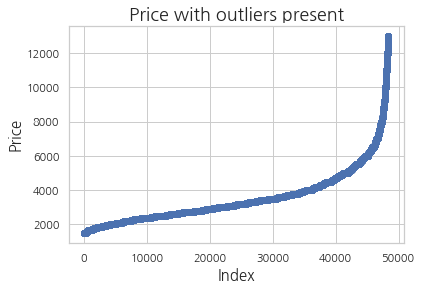

In [22]:
# price outlier 확인
plt.scatter(range(df.shape[0]), np.sort(df.price.values))
plt.title("Price with outliers present",fontsize = 18)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Price', fontsize = 15)
plt.show()

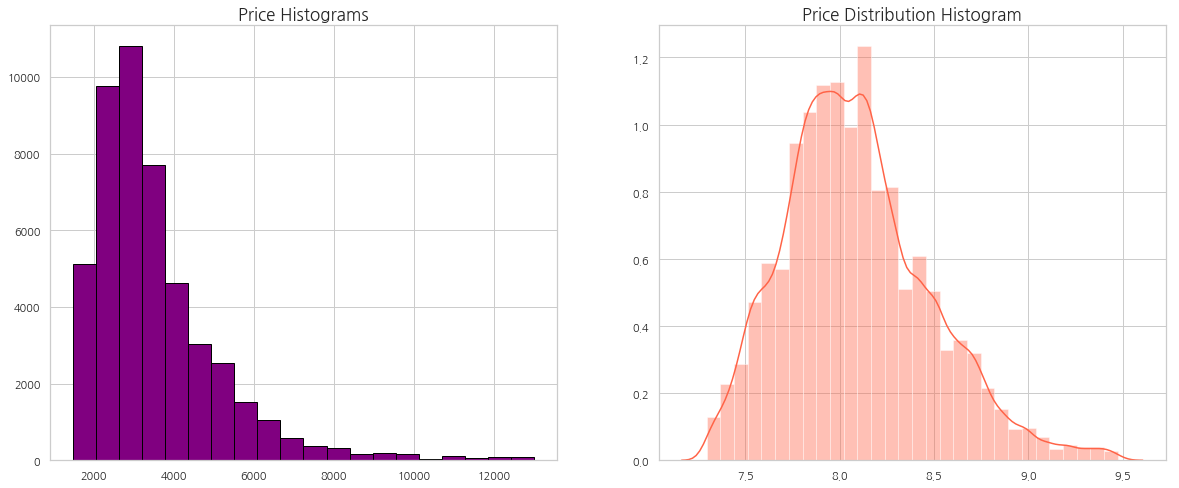

In [23]:
# price histogram
def price_histogram():
    fig,ax = plt.subplots(1,2, figsize=(20,8))
    ax1,ax2 = ax.flatten()

    df.price.plot.hist(bins=20, color='Purple', edgecolor='black', ax=ax1);
    ax1.set_title('Price Histograms', fontsize=17)
    ax1.set_ylabel('')
    ax1.set_xlabel('')

    log_price = np.log(df.price)
    sns.distplot(log_price,  bins=30, color='tomato', kde=True, ax=ax2)
    ax2.set_title("Price Distribution Histogram", fontsize=17)
    ax2.set_ylabel("")
    ax2.set_xlabel('')
    plt.subplots_adjust(wspace=0.2);

price_histogram()

In [24]:
# Log price 
df['log_price'] = df.price.map(np.log)

In [25]:
# create feature for number of photos, description length
df['num_of_photos'] = df.photos.map(len)
df['description_length'] = df.description.apply(lambda x: len(x.split(" ")))
# bedroom = 0 이면 sutdio column 추가
df['studio'] = df.bedrooms.apply(lambda x: 1 if x==0 else 0)

In [26]:
# Remove bathrooms outlier 
df.loc[df.bathrooms == 112, "bathrooms"] = 1

In [27]:
# NY 벗어나는 위도/경도(lat; 40.6976684, long; -74.2605443) outlier 제거
long_low = -74.2
long_high = -73.7
lat_low = 40.5
lat_high = 41

#Removing out of bounds longitude
df = df.drop(df[df.longitude < long_low].index)
df = df.drop(df[df.longitude > long_high].index)

#Removing out of bounds latitude
df = df.drop(df[df.latitude < lat_low].index)
df = df.drop(df[df.latitude > lat_high].index)

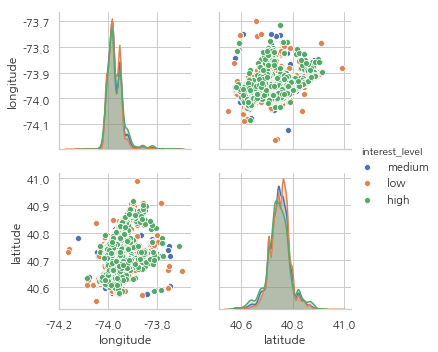

In [28]:
sns.pairplot(df[['longitude', 'latitude', 'interest_level']], hue='interest_level')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.show()

In [29]:
# feature 
df['features'].tolist()

# 하나의 리스트로 바꿔주고 모두 소문자로 변환
def flatten(vals):
    ret = []
    for i in vals:
        ret.extend([f.lower() for f in i])
    return ret

features = flatten(df['features'].tolist())

# 카운트 
count = dict()
for f in features:
    count[f] = count.get(f, 0) + 1
    
# 내림차순으로 정렬
sorted(count.items(), key=lambda x: x[1], reverse=True)

[('elevator', 25719),
 ('hardwood floors', 23180),
 ('cats allowed', 23127),
 ('dogs allowed', 21644),
 ('doorman', 20558),
 ('dishwasher', 20464),
 ('laundry in building', 18657),
 ('no fee', 17806),
 ('fitness center', 12990),
 ('laundry in unit', 9124),
 ('pre-war', 8979),
 ('roof deck', 6430),
 ('outdoor space', 5134),
 ('dining room', 4911),
 ('high speed internet', 4225),
 ('balcony', 2963),
 ('swimming pool', 2648),
 ('new construction', 2554),
 ('terrace', 2208),
 ('exclusive', 2075),
 ('loft', 2043),
 ('garden/patio', 1878),
 ('wheelchair access', 1312),
 ('prewar', 1307),
 ('common outdoor space', 1277),
 ('hardwood', 1024),
 ('simplex', 873),
 ('fireplace', 843),
 ('lowrise', 764),
 ('garage', 747),
 ('laundry room', 717),
 ('reduced fee', 684),
 ('furnished', 668),
 ('high ceilings', 603),
 ('multi-level', 601),
 ('private outdoor space', 522),
 ('publicoutdoor', 419),
 ('parking space', 410),
 ('roof-deck', 389),
 ('live in super', 352),
 ('renovated', 331),
 ('pool', 316)

In [30]:
# 기존 feature 갯수와 count.key 갯수 비교
len(features), len(count.keys())

(262357, 1273)

In [31]:
# 상위 10개 features value를 새로운 column으로 생성
def check(features, vals):
    for f in features:
        f = f.lower()
        if f in vals:
            return True
    return False

In [32]:
df['elevator'] = df.apply(lambda row: check(row['features'], ['elevator']), axis=1)

In [33]:
df['hardwood_floors'] = df.apply(lambda row: check(row['features'], ['hardwood floors', 'hardwood', 'hardwood floor', 'hardwood flooring' ]), axis=1)

In [34]:
pet_allowed = ['cats allowed', 'dogs allowed', 'pets allowed case by case', 'pets on approval', 'pet friendly', 'pets ok', 'pets', 'pets: cats/small dogs']
df['pet_allowed'] = df.apply(lambda row: check(row['features'], pet_allowed), axis=1)

In [35]:
doorman = ['doorman', 'full-time doorman', 'virtual doorman', 'ft doorman', '24/7 doorman', '24hr doorman', 'part-time doorman', '24/7 doorman concierge', '24-hour doorman', '24 hr doorman', '24 hour doorman', '24/7 full-time doorman concierge', ]
df['doorman'] = df.apply(lambda row: check(row['features'], doorman), axis=1)

In [36]:
df['dishwasher'] = df.apply(lambda row: check(row['features'], ['dishwasher', 'dish washer']), axis=1)

In [37]:
laundry = ['laundry in building', 'laundry in unit', 'on-site laundry', 'laundry room', 'laundry']
df['laundry'] = df.apply(lambda row: check(row['features'], laundry), axis=1)

In [38]:
df['no_fee'] = df.apply(lambda row: check(row['features'], ['no fee', 'reduced fee', 'low fee']), axis=1)

In [39]:
fitness_center = ['fitness center', 'gym/fitness', 'fitness room', 'state-of-the-art fitness center', 'fitness facility', 'fully-equipped club fitness center', 'state-of-the-art cardio and fitness club']
df['fitness_center'] = df.apply(lambda row: check(row['features'], fitness_center), axis=1)

In [40]:
df['pre_war'] = df.apply(lambda row: check(row['features'], ['pre-war', 'prewar', 'pre war']), axis=1)

In [41]:
roof_deck = ['roof deck', 'roof-deck', 'roofdeck', 'common roof deck', 'private roof deck', 'private roofdeck', 'roof deck with grills', 'roof deck with real grass', 'private roof-dec']
df['roof_deck'] = df.apply(lambda row: check(row['features'], roof_deck), axis=1)

In [42]:
df

,bathrooms,bedrooms,building_id,description,display_address,features,latitude,listing_id,longitude,manager_id,...,elevator,hardwood_floors,pet_allowed,doorman,dishwasher,laundry,no_fee,fitness_center,pre_war,roof_deck
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,...,False,False,False,False,False,False,False,False,False,False
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,...,True,False,True,True,False,False,False,True,False,False
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,...,False,True,True,False,True,True,False,False,False,False
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,...,False,True,False,False,False,False,True,False,False,False
100013,1.0,4,0,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,...,False,False,False,False,False,False,False,False,True,False
100014,2.0,4,38a913e46c94a7f46ddf19b756a9640c,,West 18th Street,[],40.7429,6894514,-74.0028,b209e2c4384a64cc307c26759ee0c651,...,False,False,False,False,False,False,False,False,False,False
100016,1.0,2,3ba49a93260ca5df92fde024cb4ca61f,Stunning unit with a great location and lots o...,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",40.8012,6930771,-73.9660,01287194f20de51872e81f660def4784,...,True,True,True,False,False,False,True,False,True,False
100020,2.0,1,0372927bcb6a0949613ef5bf893bbac7,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",40.7427,6867392,-73.9957,e6472c7237327dd3903b3d6f6a94515a,...,True,True,False,True,True,True,False,False,True,False
100026,1.0,1,a7efbeb58190aa267b4a9121cd0c88c0,<p><a website_redacted,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",40.8234,6898799,-73.9457,c1a6598437b7db560cde66e5a297a53f,...,True,False,True,False,False,True,False,False,False,False
100027,2.0,4,0,This is a spacious four bedroom with every bed...,522 E 11th,"[Dishwasher, Hardwood Floors]",40.7278,6814332,-73.9808,23a01ea7717b38875f5b070282d1b9d2,...,False,True,False,False,True,False,False,False,False,False


### RF로 feature Importances 알아보기

In [43]:
from sklearn import preprocessing
categorical = ['month', 'day_of_week', 'hour']
for f in categorical:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(df[f])
        df[f] = lbl.transform(df[f])

In [44]:
# RF로 feature Importances 알아보기
from sklearn.ensemble import RandomForestClassifier
X = df[['bathrooms', 'bedrooms', 'price', 'price_per_bedroom', 'num_of_photos',\
        'description_length', 'weekend', 'studio', 'elevator', 'hardwood_floors',\
        'pet_allowed', 'doorman','dishwasher', 'laundry', 'no_fee', 'fitness_center',\
        'pre_war', 'roof_deck','month', 'day_of_week', 'hour']]
y = df['interest_level']

model1 = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=0).fit(X, y)

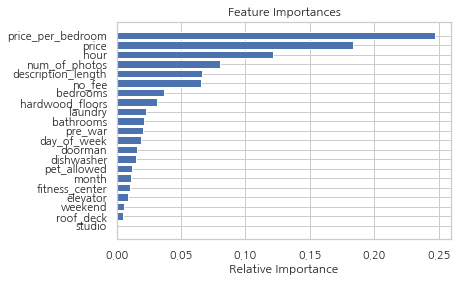

In [45]:
feature_names = ['bathrooms', 'bedrooms', 'price', 'price_per_bedroom', 'num_of_photos',\
        'description_length', 'weekend', 'studio', 'elevator', 'hardwood_floors',\
        'pet_allowed', 'doorman','dishwasher', 'laundry', 'no_fee', 'fitness_center',\
        'pre_war', 'roof_deck', 'month', 'day_of_week', 'hour']
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### colums type 정리

In [46]:
df_place = ['building_id', 'description', 'display_address ', 'latitude', 'listing_id', 'longitude'\
           'manager_id', 'street_address']
df_numeric = ['bathrooms', 'bedrooms', 'price', 'price_per_bedroom', 'log_price', 'num_of_photos'\
             'description_length']
df_categorical = ['month', 'day_of_week', 'hour']
df_bool = ['weekend', 'studio', 'elevator', 'hardwood_floors', 'pet_allowed', 'doorman',\
          'dishwasher', 'laundry', 'no_fee', 'fitness_center', 'pre_war', 'roof_deck']

In [47]:
import pickle
with open("two-sigma-connect-rental-listing-inquiries/df_feature_engineering.pkl", "rb") as f:
    load_obj = pickle.load(f)
load_obj

,bathrooms,bedrooms,building_id,description,display_address,features,latitude,listing_id,longitude,manager_id,...,elevator,hardwood_floors,pet_allowed,doorman,dishwasher,laundry,no_fee,fitness_center,pre_war,roof_deck
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,...,False,False,False,False,False,False,False,False,False,False
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,...,True,False,True,True,False,False,False,True,False,False
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,...,False,True,True,False,True,True,False,False,False,False
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,...,False,True,False,False,False,False,True,False,False,False
100013,1.0,4,0,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,...,False,False,False,False,False,False,False,False,True,False
100014,2.0,4,38a913e46c94a7f46ddf19b756a9640c,,West 18th Street,[],40.7429,6894514,-74.0028,b209e2c4384a64cc307c26759ee0c651,...,False,False,False,False,False,False,False,False,False,False
100016,1.0,2,3ba49a93260ca5df92fde024cb4ca61f,Stunning unit with a great location and lots o...,West 107th Street,"[prewar, elevator, Dogs Allowed, Cats Allowed,...",40.8012,6930771,-73.9660,01287194f20de51872e81f660def4784,...,True,True,True,False,False,False,True,False,True,False
100020,2.0,1,0372927bcb6a0949613ef5bf893bbac7,"This huge sunny ,plenty of lights 1 bed/2 bath...",West 21st Street,"[Doorman, Elevator, Pre-War, Terrace, Laundry ...",40.7427,6867392,-73.9957,e6472c7237327dd3903b3d6f6a94515a,...,True,True,False,True,True,True,False,False,True,False
100026,1.0,1,a7efbeb58190aa267b4a9121cd0c88c0,<p><a website_redacted,Hamilton Terrace,"[Cats Allowed, Dogs Allowed, Elevator, Laundry...",40.8234,6898799,-73.9457,c1a6598437b7db560cde66e5a297a53f,...,True,False,True,False,False,True,False,False,False,False
100027,2.0,4,0,This is a spacious four bedroom with every bed...,522 E 11th,"[Dishwasher, Hardwood Floors]",40.7278,6814332,-73.9808,23a01ea7717b38875f5b070282d1b9d2,...,False,True,False,False,True,False,False,False,False,False


### neighborhood column 추가  -> Clustering 사용?
- https://www.kaggle.com/luisblanche/price-compared-to-neighborhood-median

### building_id, manager_id 고민

In [48]:
# df.building_id.value_counts()

In [49]:
# df.manager_id.value_counts()